# Prompt 

Dame un diseño, para evaluar de manera manuscrita, a mis estudiantes del curso de Análisis Numérico sobre los temas de "Interpolación lineal y cuadrática, regresión lineal y cuadrática y diferenciación numérica". El parcial debe tener 5 puntos y con un nivel profesional para evaluar a futuros docentes de matemáticas de la Universidad de Antioquia. Diséñamelo, de tal manera que los datos de cada punto, se le indique a cada estudiante, como generarlos a partir de su documento de identidad, para evitar problemas de fraude durante la realización del parcial de dos horas.   



Temas a evaluar en este parcial:  

* **Interpolación lineal**
* **Interpolación cuadrática (Lagrange o Newton)**
* **Regresión lineal y cuadrática**
* **Diferenciación numérica (adelante, atrás, centradas, orden del error)**

Diseñado para **futuros docentes de matemáticas** y con **generación individual de datos** a partir del **documento de identidad (CC)** de cada estudiante para evitar copia y plagio.

---



# **Parcial manuscrito — Análisis Numérico**

### **“Interpolación, regresión y diferenciación numérica”**

Duración: **2 horas**
Modalidad: **Manuscrito, sin computador, sin celular. Calculadora científica permitida.**

Cada estudiante debe usar su **número de documento CC**, del cual se extraen valores para generar **sus propios datos únicos**.

En cada problema aparecerá una regla de la forma:

> “Sea CC = c₁c₂c₃…cₙ (todos sus dígitos). Defina …”

---



# **Estructura del parcial (5 puntos)**

---

# **Punto 1 (Interpolación lineal) — 1.0 punto**

A partir de su documento de identidad **CC = c₁c₂c₃…cₙ**, defina:

* $x_1 = (c_1 + c_3)/2$
* $x_2 = (c_2 + c_4)/2$
* $y_1 = c_5$
* $y_2 = c_6$

(convierta a número real si es necesario)

Se pide:

1. **Construya el polinomio de interpolación lineal** que pasa por $(x_1, y_1)$ y $(x_2, y_2)$.
2. **Evalúe el polinomio** en
   $$
   x^\star = \frac{x_1 + x_2}{2}.
   $$
3. Interprete el resultado como **docente de matemáticas**:
   — ¿Qué significa interpolar entre dos valores?
   — ¿Qué advertencias daría a sus estudiantes sobre extrapolar?

**Criterios:** claridad algebraica, construcción correcta, interpretación pedagógica.

---



# **Punto 2 (Interpolación cuadrática — Lagrange o Newton) — 1.0 punto**

Usando sus dígitos del documento, defina tres puntos:

* $x_0 = c_1$
* $x_1 = c_2 + 1$
* $x_2 = c_3 + 2$

y

* $y_0 = (c_4 + 1)/2$
* $y_1 = (c_5 + 2)/2$
* $y_2 = (c_6 + 3)/2$

Se pide:

1. Construya el **polinomio interpolante cuadrático por el método de Lagrange**.
   (Si desea, puede usar **Newton**, pero debe mostrar el desarrollo completo).
2. Evalúe el polinomio en
   $$
   x^\dagger = x_0 + x_2 - x_1.
   $$
3. Discuta la diferencia entre interpolación lineal y cuadrática:
   — ¿Cuándo es preferible cada una?

---



# **Punto 3 (Regresión lineal y cuadrática) — 1.0 punto**

Genere los siguientes datos a partir de su CC:

Para $i=1,2,3,4$:

* $x_i = i$
* $y_i = (c_i + 1), i + c_{i+4}$

1. Forme la tabla $(x_i, y_i)$.
2. Calcule **a mano**:

   * La **recta de regresión lineal** $y = a + bx$
   * El **error cuadrático total**
3. Forme el sistema para la **regresión cuadrática**
   $$
   y = \alpha + \beta x + \gamma x^2.
   $$
   No se exige resolverlo completamente, pero sí plantearlo correctamente.
4. Como futuro docente, explique:
   — ¿Por qué la regresión **no** pasa exactamente por los puntos?
   — ¿Qué diferencia la regresión de la interpolación?

---



# **Punto 4 (Diferenciación numérica) — 1.0 punto**

Considere la función
$$
f(x) = e^{-kx}\sin(x),
$$
donde
$$
k = (c_1 + c_2)/10.
$$

Defina:

* $x_0 = 1$
* $h = (c_3 + 1)/50$

Se pide:

1. Calcule **aproximaciones numéricas de $f'(x_0)$** con:

   * Fórmula hacia adelante
   * Fórmula hacia atrás
   * Fórmula centrada
2. Organice sus cálculos en una tabla.
3. Explique cuál de las tres suele ser más precisa y por qué.
4. Analice el **orden del error** de cada método.

---



# **Punto 5 (Problema integrador) — 1.0 punto**

Considere un fenómeno físico simple:

> La temperatura en una lámina metálica varía en dirección horizontal.
> Sus valores medidos se generarán así:

Para $i = 1,2,3,4,5$:

* $x_i = i$
* $T_i = 20 + (c_i - 4)^2$

Se pide:

1. Construya el **polinomio interpolante cuadrático** usando los puntos
   $(x_1,T_1), (x_3,T_3), (x_5,T_5)$.
2. Construya la **recta de regresión lineal** usando los cinco puntos.
3. Compare ambos modelos:
   — ¿Cuál suaviza más la curva?
   — ¿Cuál sigue más fielmente los datos extremos?
4. Use **diferenciación numérica centrada** para aproximar
   $$
   T'(x_3),
   $$
   e interprete el valor en el contexto físico:
   ¿La temperatura aumenta o disminuye alrededor de $x_3$?




# **Formulario — Análisis Numérico**

### *Interpolación lineal y cuadrática · Regresión lineal y cuadrática · Diferenciación numérica*

---



## **1. Interpolación lineal**

### **Recta que interpola dos puntos $(x_0, y_0)$ y $(x_1, y_1)$**

$$
P_1(x) = y_0 + \frac{y_1-y_0}{x_1-x_0}(x - x_0)
$$



### **Forma general de Lagrange para grado 1**

$$
P_1(x)= y_0,\frac{x-x_1}{x_0-x_1} + y_1,\frac{x-x_0}{x_1-x_0}
$$

---



## **2. Interpolación cuadrática**

### **Polinomio de Lagrange (3 puntos)**

Dados $(x_0,y_0),(x_1,y_1),(x_2,y_2)$:
$$
P_2(x)=y_0,L_0(x)+y_1,L_1(x)+y_2,L_2(x)
$$

Con:
$$
L_0(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}
$$
$$
L_1(x)=\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}
$$
$$
L_2(x)=\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
$$

---



## **3. Regresión lineal**

### **Modelo**

$$
y = a + bx
$$



### **Coeficientes por mínimos cuadrados**

$$
b=\frac{n\sum x_i y_i - \sum x_i \sum y_i}{n\sum x_i^2 - (\sum x_i)^2}
$$
$$
a=\frac{\sum y_i - b\sum x_i}{n}
$$



### **Coeficiente de correlación**

$$
r=\frac{n\sum x_i y_i - \sum x_i \sum y_i}{\sqrt{\left(n\sum x_i^2 - (\sum x_i)^2\right)\left(n\sum y_i^2 - (\sum y_i)^2\right)}}
$$

---



## **4. Regresión cuadrática**

### **Modelo**

$$
y = a + bx + cx^2
$$



### **Sistema normal (mínimos cuadrados)**

$$
\begin{cases}
n a + (\sum x_i) b + (\sum x_i^2)c = \sum y_i \
(\sum x_i) a + (\sum x_i^2)b + (\sum x_i^3)c = \sum x_i y_i \
(\sum x_i^2) a + (\sum x_i^3)b + (\sum x_i^4)c = \sum x_i^2 y_i
\end{cases}
$$

*(El estudiante resuelve este sistema para obtener (a,b,c).)*

---



## **5. Diferenciación numérica**

### **Diferencia hacia adelante (primer orden)**

$$
f'(x_i)\approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### **Diferencia hacia atrás (primer orden)**

$$
f'(x_i)\approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### **Diferencia central (segundo orden)**

$$
f'(x_i)\approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

### **Segunda derivada (diferencia central)**

$$
f''(x_i)\approx \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2}
$$

---



## **6. Error en la interpolación (opcional si deseas incluirlo)**

### **Error general de interpolación polinómica**

$$
f(x)-P_n(x)=\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-x_0)(x-x_1)\dots(x-x_n)
$$




Cada bloque corresponde a uno de los **5 puntos del parcial**:

1. **Interpolación lineal**
2. **Interpolación cuadrática**
3. **Regresión lineal**
4. **Regresión cuadrática**
5. **Diferenciación numérica**

Los scripts usan **NumPy, Pandas, Matplotlib, Seaborn, SymPy y Plotly**.

---



# **INSTRUCCIÓN GENERAL PARA LOS ESTUDIANTES**

Cada estudiante debe reemplazar esta línea:


In [2]:
dni = 98640265   # Cambie este número por su documento de identidad




Y ejecutar los scripts.

Todos los datos se generan automáticamente a partir del DNI para evitar plagio.

---

# 🟩 **IMPORTACIONES GENERALES (pegue esto al inicio del cuaderno)**

```python


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sympy import symbols, interpolate
from IPython.display import display


# **PUNTO 1 — INTERPOLACIÓN LINEAL**

**Datos generados según el DNI**

* Se tomarán 2 puntos:

  * $ x_1 = (dni \mod 7) + 1 $
  * $ x_2 = x_1 + 3 $
  * $ y_i = \sin(x_i + (dni \mod 10)) $

---



# **Script**


=== PUNTO 1: INTERPOLACIÓN LINEAL ===


,x,y
0,2,-0.999990
1,5,0.990607


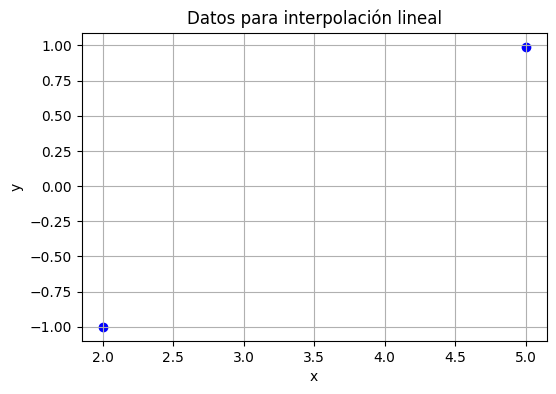

Polinomio de interpolación lineal:


0.663532520748525*t - 2.32705524804775

Predicción en x = 3.5:  y = -0.004691425427916673


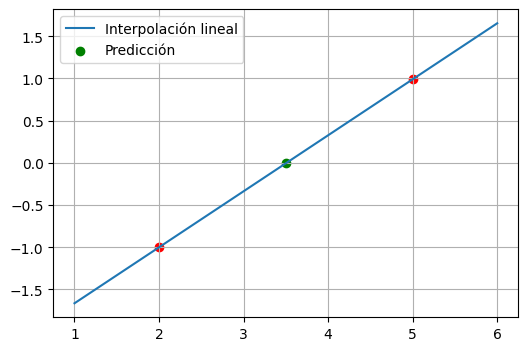

In [4]:
dni = 123456789   # <<< CAMBIE ESTE NÚMERO

print("=== PUNTO 1: INTERPOLACIÓN LINEAL ===")

# Generación de datos
x1 = (dni % 7) + 1
x2 = x1 + 3
shift = (dni % 10)

x = np.array([x1, x2])
y = np.sin(x + shift)

df1 = pd.DataFrame({"x": x, "y": y})
display(df1)

# Gráfico de los datos
plt.figure(figsize=(6,4))
plt.scatter(x, y, color="blue")
plt.title("Datos para interpolación lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Interpolación lineal con SymPy
t = symbols('t')
poly_lin = interpolate([(x[0], y[0]), (x[1], y[1])], t)

print("Polinomio de interpolación lineal:")
display(poly_lin)

# Predicción
x_pred = x1 + 1.5
y_pred = poly_lin.subs(t, x_pred)
print(f"Predicción en x = {x_pred}:  y = {float(y_pred)}")

# Gráfico del modelo
t_vals = np.linspace(x1-1, x2+1, 200)
y_vals = [poly_lin.subs(t, val) for val in t_vals]

plt.figure(figsize=(6,4))
plt.plot(t_vals, y_vals, label="Interpolación lineal")
plt.scatter(x, y, color="red")
plt.scatter([x_pred], [y_pred], color="green", label="Predicción")
plt.legend()
plt.grid(True)
plt.show()



# **PUNTO 2 — INTERPOLACIÓN CUADRÁTICA**

**Datos generados según el DNI**

* 3 puntos:

  * ( x_1 = (dni \mod 5) + 1 )
  * ( x_2 = x_1 + 2 )
  * ( x_3 = x_2 + 3 )
  * ( y_i = \cos(x_i + (dni \mod 8)) )





## 📌 Script

```python


print("\n\n=== PUNTO 2: INTERPOLACIÓN CUADRÁTICA ===")

x1 = (dni % 5) + 1
x2 = x1 + 2
x3 = x2 + 3
shift = dni % 8

x = np.array([x1, x2, x3])
y = np.cos(x + shift)

df2 = pd.DataFrame({"x": x, "y": y})
display(df2)

# Gráfico de datos
plt.figure(figsize=(6,4))
plt.scatter(x, y, color="purple")
plt.title("Datos para interpolación cuadrática")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Interpolación cuadrática con SymPy
poly_quad = interpolate([(x[i], y[i]) for i in range(3)], t)
display(poly_quad)

# Predicción
x_pred = x1 + 1
y_pred = poly_quad.subs(t, x_pred)
print(f"Predicción en x = {x_pred}:  y = {float(y_pred)}")

# Gráfico del modelo
t_vals = np.linspace(x1-1, x3+1, 300)
y_vals = [poly_quad.subs(t, val) for val in t_vals]

plt.figure(figsize=(6,4))
plt.plot(t_vals, y_vals, color="black", label="Interpolación cuadrática")
plt.scatter(x, y, color="red")
plt.scatter([x_pred], [y_pred], color="green", label="Predicción")
plt.grid(True)
plt.legend()
plt.show()



# **PUNTO 3 — REGRESIÓN LINEAL**

Generación de datos:

* 10 puntos con ruido dependiente del DNI:

  * $x_i = i$
  * $y_i = 2x_i + 3 + \text{ruido}$
  * ruido: $\text{Normal}(0, (dni \mod 5)+1)$

---



# Script


In [ ]:
print("\n\n=== PUNTO 3: REGRESIÓN LINEAL ===")

np.random.seed(dni % 1000)

x = np.arange(1, 11)
noise = np.random.normal(0, (dni % 5) + 1, size=10)
y = 2*x + 3 + noise

df3 = pd.DataFrame({"x": x, "y": y})
display(df3)

sns.scatterplot(x=x, y=y)
plt.title("Datos para regresión lineal")
plt.grid(True)
plt.show()

# Modelo
coef = np.polyfit(x, y, 1)
m, b = coef
print(f"Modelo: y = {m}x + {b}")

# Predicción
x_pred = 12
y_pred = m*x_pred + b
print(f"Predicción en x = {x_pred}: y = {y_pred}")

# Gráfico del modelo
plt.plot(x, m*x + b, color="red")
plt.scatter(x, y)
plt.grid(True)
plt.show()




---

# 🟪 **PUNTO 4 — REGRESIÓN CUADRÁTICA**

Generación de datos:

* 12 puntos:

  * ( y_i = x_i^2 - 4x_i + 7 + \text{ruido} )

---

## 📌 Script

```python
print("\n\n=== PUNTO 4: REGRESIÓN CUADRÁTICA ===")

x = np.arange(1, 13)
noise = np.random.normal(0, (dni % 4) + 1, size=12)
y = x**2 - 4*x + 7 + noise

df4 = pd.DataFrame({"x": x, "y": y})
display(df4)

sns.scatterplot(x=x, y=y)
plt.title("Datos para regresión cuadrática")
plt.grid(True)
plt.show()

# Modelo
coef = np.polyfit(x, y, 2)
a, b, c = coef
print(f"Modelo: y = {a}x^2 + {b}x + {c}")

x_pred = 14
y_pred = a*x_pred**2 + b*x_pred + c
print(f"Predicción en x = {x_pred}: y = {y_pred}")

plt.plot(x, a*x**2 + b*x + c, color="orange")
plt.scatter(x, y)
plt.grid(True)
plt.show()
```

---

# 🟩 **PUNTO 5 — DIFERENCIACIÓN NUMÉRICA**

Función generada según el DNI:

* ( f(x) = \ln(x + (dni \mod 9) + 1) )

Se pide:

* Diferencias hacia adelante
* Diferencias hacia atrás
* Diferencias centradas

---

## 📌 Script

```python


In [1]:
print("\n\n=== PUNTO 5: DIFERENCIACIÓN NUMÉRICA ===")

shift = (dni % 9) + 1

def f(x):
    return np.log(x + shift)

x_vals = np.linspace(1, 10, 10)
h = x_vals[1] - x_vals[0]

df5 = pd.DataFrame({
    "x": x_vals,
    "f(x)": f(x_vals)
})
display(df5)

# Derivadas numéricas
forward = (f(x_vals[1:]) - f(x_vals[:-1])) / h
backward = np.concatenate([[np.nan], (f(x_vals[1:]) - f(x_vals[:-1])) / h])
central = (f(x_vals[2:]) - f(x_vals[:-2])) / (2*h)

df_der = pd.DataFrame({
    "x": x_vals,
    "Forward": np.concatenate([forward, [np.nan]]),
    "Backward": backward,
    "Central": np.concatenate([[np.nan], central, [np.nan]])
})
display(df_der)

plt.plot(x_vals, f(x_vals), label="f(x)")
plt.title("Función para diferenciación")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(df_der["x"], df_der["Central"], label="Central diff")
plt.scatter(df_der["x"], df_der["Central"])
plt.grid(True)
plt.legend()
plt.title("Diferenciación numérica")
plt.show()




=== PUNTO 5: DIFERENCIACIÓN NUMÉRICA ===


NameError: name 'dni' is not defined

# Universidad de Antioquia – Seccional Bajo Cauca  
### Programa: Ingeniería Agropecuaria  
### Curso: Matemáticas Aplicadas al Procesamiento de Datos  
### Docente: Marco Julio Cañas  
### Parcial 3 - Interpolación, Regresión y Derivación Numérica  
**Duración:** 120 minutos  
**Nombre del estudiante:** ___________________________  
**Fecha:** ______________________

---



### **Temas evaluados**
1. Interpolación lineal y cuadrática  
2. Regresión lineal y cuadrática  
3. Derivación numérica: conceptos y métodos básicos  


## **Punto 1. Teórico (20%) — Falso o Verdadero con justificación corta**

Marque **V** si la afirmación es verdadera o **F** si es falsa, y **justifique brevemente** su respuesta (1 o 2 líneas).

1. (   ) La interpolación busca ajustar un modelo que **minimiza los errores** entre los datos y la curva ajustada.  
2. (   ) En la interpolación cuadrática se requiere **al menos tres puntos** distintos para definir el polinomio.  
3. (   ) En una regresión lineal, el objetivo principal es que el modelo **pase exactamente por los datos observados**.  
4. (   ) La derivada numérica por diferencias hacia adelante se basa en el valor de la función **en el punto y en un punto posterior**.  
5. (   ) Si una función es suave, las derivadas numéricas calculadas por diferencias centradas son **más precisas** que las hacia adelante o hacia atrás.  

_Responda aquí:_  


## **Punto 2. Interpolación lineal y cuadrática (20%)**

| Mes (x) | Producción (y) |
|----------|----------------|
| 1 | 22 |
| 4 | 35 |
| 6 | 47 |


In [ ]:
import numpy as np
from scipy.interpolate import interp1d

x = np.array([1, 4, 6])
y = np.array([22, 35, 47])

interp_lin = interp1d(x, y, kind='linear')
interp_quad = interp1d(x, y, kind='quadratic')

y3_lin = interp_lin(3)
y5_quad = interp_quad(5)

print(f"Interpolación lineal en x=3: {y3_lin:.2f}")
print(f"Interpolación cuadrática en x=5: {y5_quad:.2f}")

## **Punto 3. Regresión lineal y cuadrática (20%)**

| Fertilizante (x) | Rendimiento (y) |
|------------------|-----------------|
| 10 | 3.1 |
| 20 | 3.6 |
| 30 | 4.0 |
| 40 | 4.5 |
| 50 | 4.8 |


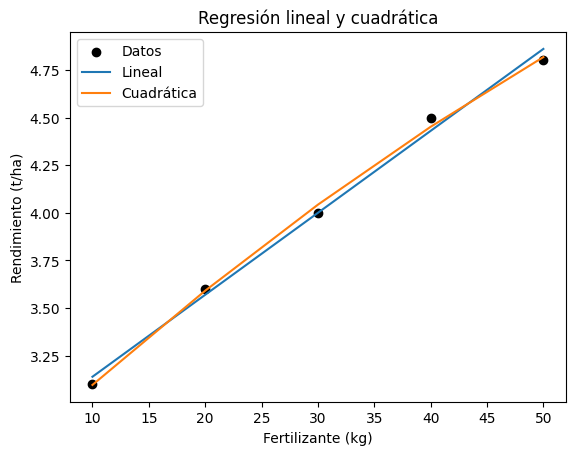

Modelo lineal:  
0.043 x + 2.71
Modelo cuadrático:             2
-0.0002143 x + 0.05586 x + 2.56


In [2]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.array([10, 20, 30, 40, 50])
y = np.array([3.1, 3.6, 4.0, 4.5, 4.8])

coef_lin = np.polyfit(x, y, 1)
coef_quad = np.polyfit(x, y, 2)

p_lin = np.poly1d(coef_lin)
p_quad = np.poly1d(coef_quad)

plt.scatter(x, y, label="Datos", color='black')
plt.plot(x, p_lin(x), label="Lineal")
plt.plot(x, p_quad(x), label="Cuadrática")
plt.legend()
plt.title("Regresión lineal y cuadrática")
plt.xlabel("Fertilizante (kg)")
plt.ylabel("Rendimiento (t/ha)")
plt.savefig(r"C:\Users\marco\Downloads\regresion.png")
plt.show()

print("Modelo lineal:", p_lin)
print("Modelo cuadrático:", p_quad)

## **Punto 4. Derivación numérica (20%)**

| x | f(x) |
|---|------|
| 0 | 1.0 |
| 0.5 | 1.65 |
| 1.0 | 2.72 |
| 1.5 | 4.48 |


In [3]:
x = np.array([0, 0.5, 1.0, 1.5])
f = np.array([1.0, 1.65, 2.72, 4.48])
h = x[1] - x[0]

fwd = (f[2] - f[1]) / h
ctr = (f[3] - f[1]) / (2*h)

print(f"Derivada hacia adelante en x=0.5: {fwd:.3f}")
print(f"Derivada centrada en x=1.0: {ctr:.3f}")

Derivada hacia adelante en x=0.5: 2.140
Derivada centrada en x=1.0: 2.830


## **Punto 5. Ejercicio de aplicación integrada (20%)**

| Día (x) | Temperatura (°C) | Crecimiento (cm/día) |
|----------|------------------|----------------------|
| 1 | 25 | 2.1 |
| 2 | 27 | 2.6 |
| 3 | 30 | 3.0 |
| 4 | 33 | 3.4 |
| 5 | 35 | 3.8 |


In [2]:
import numpy as np 
from scipy.interpolate import interp1d 

x = np.array([25, 27, 30, 33, 35])
y = np.array([2.1, 2.6, 3.0, 3.4, 3.8])

interp_quad = interp1d(x, y, kind='quadratic')
y31 = interp_quad(31)

coef_lin = np.polyfit(x, y, 1)
p_lin = np.poly1d(coef_lin)

dy_dx = (y[3] - y[1]) / (x[3] - x[1])

print(f"Crecimiento interpolado a 31°C: {y31:.2f} cm/día")
print(f"Modelo lineal: {p_lin}")
print(f"Derivada centrada ≈ {dy_dx:.3f} cm/día/°C")

Crecimiento interpolado a 31°C: 3.12 cm/día
Modelo lineal:  
0.1603 x - 1.829
Derivada centrada ≈ 0.133 cm/día/°C


## **Autoevaluación computacional**

In [7]:
assert abs(y3_lin - 29.0) < 1.0, "Verifique la interpolación lineal."
assert abs(y5_quad - 44.0) < 1.5, "Verifique la interpolación cuadrática."
assert abs(fwd - 2.14) < 0.3, "Verifique la derivada hacia adelante."
assert abs(ctr - 2.83) < 0.3, "Verifique la derivada centrada."
print("✅ Autoevaluación superada: los resultados son coherentes.")

NameError: name 'y3_lin' is not defined